In [1]:
import os
import sys
import random
from glob import glob
from copy import deepcopy
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.instruments.hwo import HWO
from mejiro.synthetic_image import SyntheticImage
from mejiro.galaxy_galaxy import GalaxyGalaxy, SampleGG, SampleBELLS, SampleSL2S
from mejiro.exposure import Exposure
from mejiro.utils import util

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

# set HWO directory
hwo_dir = os.path.join(repo_dir, 'hwo')

Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.


In [2]:
synthetic_image = SyntheticImage(strong_lens=SampleGG(),
                                    instrument=HWO(),
                                    band='J',
                                    verbose=False)

exposure_with = Exposure(synthetic_image,
                    exposure_time=1000,
                    engine='galsim',
                    engine_params={'sky_background': True},
                    verbose=False)

exposure_without = Exposure(synthetic_image,
                    exposure_time=1000,
                    engine='galsim',
                    engine_params={'sky_background': False},
                    verbose=False)

sky_background: galsim.Image(bounds=galsim.BoundsI(1,291,1,291), scale=0.017188733853924696, dtype=numpy.float64)
sky_background: None


In [3]:
print(type(exposure_with.sky_background))

<class 'galsim.image.Image'>


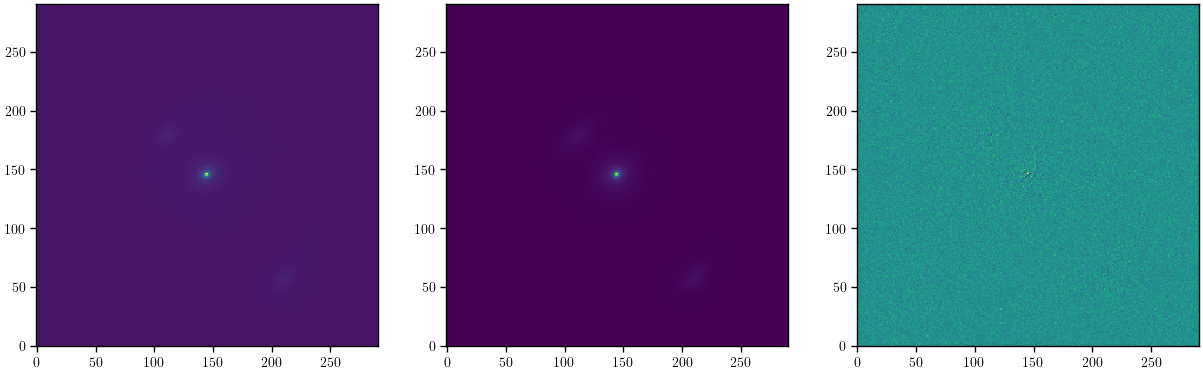

In [8]:
_, ax = plt.subplots(1, 3, figsize=(15, 5))

vmin = 0
vmax = np.max([exposure_with.exposure, exposure_without.exposure])

ax[0].imshow(exposure_with.exposure, vmin=0, vmax=vmax)
ax[1].imshow(exposure_without.exposure, vmin=0, vmax=vmax)
ax[2].imshow(exposure_with.exposure - exposure_without.exposure)

plt.show()